"""
Breadth-First Search (BFS) is a traversal algorithm for graphs and trees.
It explores neighbors level by level.

Used for:
- Finding the shortest path in an unweighted graph
- Level-order traversal in trees
- Flood fill (e.g., in image processing)

Core data structure: Queue (FIFO)

This notebook is part of the portfolio project:
🧭 "Teaching an AI to Crawl Dungeons: Memory, Keys, and Doors with Deep Q-Learning"

We begin by building a BFS baseline to solve a gridworld maze, and later extend the environment into a dungeon-crawling scenario requiring sequential actions (e.g., collect key → open door → reach goal).

Visual rendering is optimized for dark mode using custom colormaps and hatched wall patterns.
"""

In [42]:
from collections import deque
from enum import Enum, auto
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from IPython.display import clear_output


In [43]:
random.seed(42)
np.random.seed(42)

In [44]:
class GridCellValues(Enum):
    EMPTY=0
    WALL=auto()
    VISITED=auto()
    GOAL=auto()
    PATH=auto()   
    START=auto()

In [51]:
# --------------------
# Grid-based BFS Example (Shortest Path in Grid)
# --------------------

def render_grid(grid, delay=0.2):
    clear_output(wait=True)
    cmap = ListedColormap([
        '#1e1e1e',  # 0 - empty (dark gray)
        '#ff4c4c',  # 1 - wall (red)
        '#4c91ff',  # 2 - visited (blue)
        '#4cff4c',  # 3 - goal (green)
        '#ffff4c'   # 4 - path (yellow)
    ])
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    ax.imshow(grid, cmap=cmap, vmin=0, vmax=4)
    start = np.argwhere(grid==GridCellValues.START.value)[0]
    start_row, start_col = start[0], start[1]

    rows, cols = grid.shape
    for r in range(rows):
        for c in range(cols):
            if r == start_row and c == start_col:
                ax.add_patch(Rectangle((c - 0.5, r - 0.5), 1, 1,
                                       facecolor='none', edgecolor='white', linewidth=2))
                ax.text(c, r, 'S', ha='center', va='center', fontsize=14, color='red')
            elif grid[r][c] == GridCellValues.WALL.value:  # wall
                rect = Rectangle((c - 0.5, r - 0.5), 1, 1,
                                 linewidth=0,
                                 edgecolor=None,
                                 facecolor='none',
                                 hatch='///')
                ax.add_patch(rect)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()
    time.sleep(delay)


In [50]:
"""
Grid cell values:
0 = empty
1 = wall
2 = visited
3 = goal
4 = final path
"""

def bfs_visual(grid):

    # get starting position dynamically to avoid func parameters
    start = np.argwhere(grid==GridCellValues.START.value)[0]
    # Starting values
    r, c = start[0], start[1]
    
    rows, cols = grid.shape[0], grid.shape[1]
    visited = set()
    queue = deque()
    queue.append(start)
    parent = dict()

    directions = [(-1,0),(1,0),(0,-1),(0,1)]

    while queue:
        r, c = queue.popleft()

        if (r, c) in visited:
            continue
        visited.add((r, c))

        if grid[r][c] == GridCellValues.GOAL.value:
            break

        if grid[r][c] not in [GridCellValues.GOAL.value, GridCellValues.START.value]:
            grid[r][c] = GridCellValues.VISITED.value  # mark as visited
        render_grid(grid)

        random.shuffle(directions)
        for dr, dc in directions:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] in [GridCellValues.EMPTY.value, GridCellValues.GOAL.value] and (nr, nc) not in visited:
                parent[(nr, nc)] = (r, c)
                queue.append((nr, nc))

    # reconstruct path
    path = []
    # Goal
    cur = (r, c)
    while cur in parent:
        path.append(cur)
        cur = parent[cur]
    for r, c in path:
        if grid[r][c] not in [GridCellValues.GOAL.value, GridCellValues.START.value]:
            grid[r][c] = GridCellValues.PATH.value
        render_grid(grid)

In [47]:
# --------------------
# BFS Key Concepts Summary:
# --------------------

"""
- Always use a queue (FIFO) and a visited set.
- Great for shortest path in unweighted graphs.
- Suitable for exploring all nodes at depth `d` before `d+1`.
- For grid traversal, track row/column bounds and visited cells.
- Visualization can use imshow() to render grid states.
- Custom colormaps improve accessibility in dark mode.
- This baseline will later be extended into a dungeon with multi-step goal logic (e.g., collect items in order).
"""

'\n- Always use a queue (FIFO) and a visited set.\n- Great for shortest path in unweighted graphs.\n- Suitable for exploring all nodes at depth `d` before `d+1`.\n- For grid traversal, track row/column bounds and visited cells.\n- Visualization can use imshow() to render grid states.\n- Custom colormaps improve accessibility in dark mode.\n- This baseline will later be extended into a dungeon with multi-step goal logic (e.g., collect items in order).\n'

In [48]:
grid = np.random.choice([0,1], (5,5), p=[0.7, 0.3])
rows, cols = grid.shape
goal_row, goal_col = np.random.randint(0, rows), np.random.randint(0, cols)
grid[goal_row][goal_col] = GridCellValues.GOAL.value
start_row, start_col = np.random.randint(0, rows), np.random.randint(0, cols)
grid[start_row, start_col] = GridCellValues.START.value

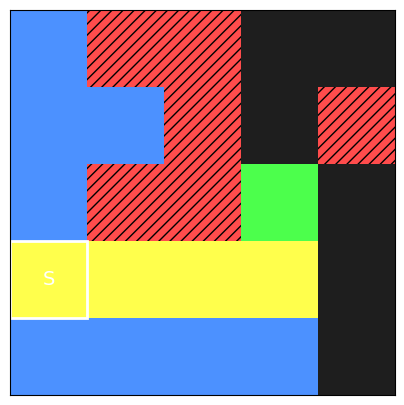

In [49]:
bfs_visual(grid)